<a href="https://colab.research.google.com/github/DeodatoBastos/Imersao_Dados/blob/main/ImersaoDados_4_Pesquisa_de_Imoveis_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

## Visão geral do *dataset*

In [86]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [87]:
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
8103,NaN,Saúde,São Paulo,140,3,2,3,R$ 3.200.000
2474,Rua Maria Teresa Assunção,Vila São Geraldo,São Paulo,165,3,3,2,R$ 636.000
2276,Rua Irmão Gonçalo,Jardim das Bandeiras,São Paulo,815,6,5,8,R$ 8.000.000
4800,NaN,Vila Sônia,São Paulo,302,4,5,4,R$ 1.900.000
1806,Rua Ingles de Sousa,Jardim da Glória,São Paulo,125,3,2,5,R$ 1.700.000
2005,Rua Pacobá,Jardim Panorama,São Paulo,639,4,2,4,R$ 4.000.000
7646,NaN,Jardim Paulista,São Paulo,500,4,6,8,R$ 35.000\n /Mês
287,NaN,Vila Ida,São Paulo,255,3,5,3,R$ 2.200.000
1483,NaN,Brooklin Paulista,São Paulo,620,4,6,7,R$ 4.440.000
2938,NaN,Jardim Paulista,São Paulo,800,5,7,6,R$ 9.580.000


In [88]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


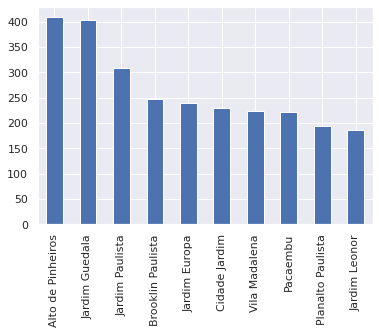

In [89]:
n_imoveis_bairro = dados["Bairro"].value_counts()
n_imoveis_bairro.head(10).plot.bar()

## Metragem de cada bairro

In [90]:
metragem_por_bairro = dados.groupby(by='Bairro')['Metragem']
media_metragem = metragem_por_bairro.mean().sort_values(ascending=False)
media_metragem

Bairro
Sítio Represa                        37000.00
Vila Castelo                          2850.00
Jardim Guedala                        2486.64
Jardim das Camélias                   1700.00
Chácara Flora                         1260.73
                                       ...   
Cidade Antônio Estevão de Carvalho      57.50
Jardim Nova Germania                    57.00
Jardim Benfica                          48.00
Vila Leonor                             46.00
Vila Guaca                              10.00
Name: Metragem, Length: 701, dtype: float64

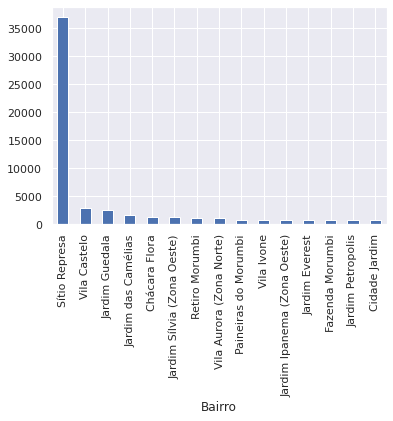

In [91]:
media_metragem.head(15).plot.bar()

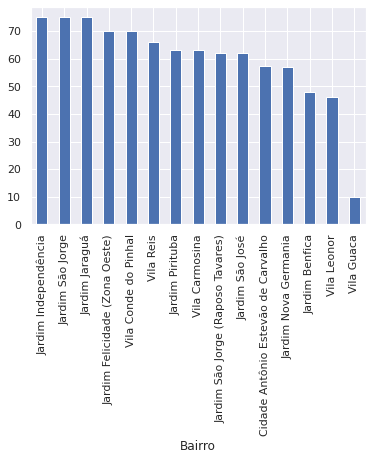

In [92]:
media_metragem.tail(15).plot.bar()

## Filtros por bairros

In [93]:
bairro_cidade_jardim = dados.loc[lambda df: df['Bairro'] == 'Cidade Jardim', :]
bairro_cidade_jardim.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
8901,Rua Doutor Wilton Paes de Almeida,Cidade Jardim,São Paulo,640,4,6,3,R$ 2.700.000
3054,Rua das Begônias,Cidade Jardim,São Paulo,456,5,4,7,R$ 2.200.000
1066,Rua Boytac,Cidade Jardim,São Paulo,555,4,3,6,R$ 5.300.000
9040,Rua Inocêncio Nogueira,Cidade Jardim,São Paulo,480,4,5,4,R$ 4.700.000
3420,NaN,Cidade Jardim,São Paulo,550,4,5,4,R$ 15.000\n /Mês
2745,NaN,Cidade Jardim,São Paulo,589,3,4,6,R$ 5.500.000
6213,NaN,Cidade Jardim,São Paulo,1822,5,8,6,R$ 12.000.000
728,Rua dos Limantos,Cidade Jardim,São Paulo,700,3,3,4,R$ 15.000\n /Mês
6319,Rua das Begônias,Cidade Jardim,São Paulo,406,4,4,6,R$ 2.800.000
6439,NaN,Cidade Jardim,São Paulo,700,4,4,5,R$ 20.000\n /Mês


In [94]:
bairro_pacaembu = dados[dados['Bairro'] == 'Pacaembu']
bairro_pacaembu.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
2863,Rua Doutor Manoel Maria Tourinho,Pacaembu,São Paulo,422,4,4,1,R$ 2.500.000
2517,"Rua Gustavo Teixeira, 55",Pacaembu,São Paulo,350,3,2,4,R$ 2.700.000
2838,Rua Senador João Lira,Pacaembu,São Paulo,300,4,4,3,R$ 2.500.000
4126,Rua Teodoro Ramos,Pacaembu,São Paulo,280,3,2,3,R$ 2.800.000
7874,NaN,Pacaembu,São Paulo,660,3,5,12,R$ 9.000.000
3244,Rua Itaperuna,Pacaembu,São Paulo,1000,4,3,4,R$ 8.990.000
5459,NaN,Pacaembu,São Paulo,364,4,5,4,R$ 3.400.000
8944,Rua João Florêncio,Pacaembu,São Paulo,300,3,2,4,R$ 2.800.000
8189,Rua Ferdinando Laboriau,Pacaembu,São Paulo,455,4,4,4,R$ 2.350.000
659,Rua Gustavo Teixeira,Pacaembu,São Paulo,300,3,3,6,R$ 2.700.000


## Análises sobre alguns dados

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f40fb192bd0>,
      dtype=object)

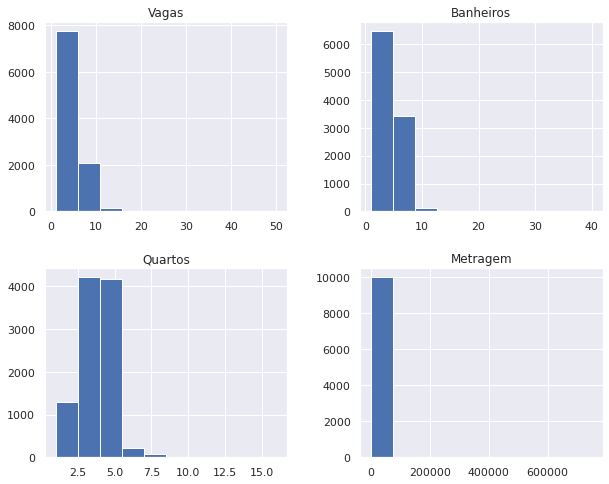

In [95]:
dados[['Vagas', 'Banheiros', 'Quartos', 'Metragem']].hist(figsize=(10, 8))

### Conclusões

A partir dos histogramas plotados, pode-se ver que a há uma concentração muito grande em pequenos valores nas colunas *Vagas*, *Banheiros*, *Quartos*.

Na coluna *Metragem* há algum dado muito destoante, visto que no histograma há valores bem altos, porém quase não há pontos com altos valores. Isso pode significar que esses pontos destoantes podem ser erros na hora de criar o *dadosset*.

Algo semelhante é visto nas outras colunas, contudo o fenômeno não é tão acentuado quanto na *Metragem*. Logo, retirar esses dados pode ser uma boa ação para evitar futuros problemas com o modelo a ser criado.

## Outros dados relevantes

In [96]:
dt_filter = dados[['Quartos', 'Banheiros', 'Vagas']]
dt_filter.head()

,Quartos,Banheiros,Vagas
0,4,8,6
1,4,4,4
2,4,3,2
3,3,2,4
4,3,2,2


In [97]:
mean_list = dt_filter.mean().to_list()
median_list = dt_filter.median().to_list()
min_list = dt_filter.min().to_list()
max_list = dt_filter.max().to_list()
std_list = dt_filter.std().to_list()

In [98]:
dict_dados = {'Media': mean_list, 'Mediana': median_list,
             'Minimo': min_list, 'Maximo': max_list,
             'Desvio_Padrao': std_list}
statistics = pd.DataFrame(data=dict_dados, index=['Quartos',  'Banheiros', 'Vagas'])
statistics

,Media,Mediana,Minimo,Maximo,Desvio_Padrao
Quartos,3.48,3.00,1,16,1.06
Banheiros,3.88,4.00,1,40,1.99
Vagas,4.10,4.00,1,50,2.82


## Bairros sem nome de rua

In [99]:
ruas_sem_nome = dados[dados['Rua'].isna()]
ruas_sem_nome.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
5907,NaN,Vila Macedópolis,São Paulo,432,2,1,6,R$ 960.000
2046,NaN,Jardim Guedala,São Paulo,742,5,7,6,R$ 3.400.000
8704,NaN,Vila Darli,São Paulo,150,3,2,2,R$ 585.000
9363,NaN,Vila Romano,São Paulo,152,3,2,2,R$ 850.000
3753,NaN,Vila São Silvestre,São Paulo,120,2,1,1,R$ 636.000
5634,NaN,Jardim Europa,São Paulo,952,3,7,10,R$ 27.000.000
6436,NaN,Jardim Paulistano,São Paulo,180,3,1,3,R$ 3.000.000
3505,NaN,Alto de Pinheiros,São Paulo,220,4,4,6,R$ 2.800.000
3570,NaN,Vila Jacuí,São Paulo,80,2,1,1,R$ 265.000
2338,NaN,Jardim Leonor,São Paulo,491,4,8,4,R$ 3.100.000


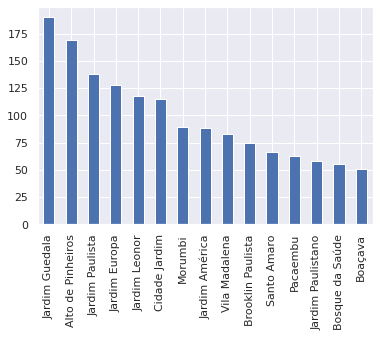

In [100]:
ruas_sem_nome['Bairro'].value_counts().head(15).plot.bar()

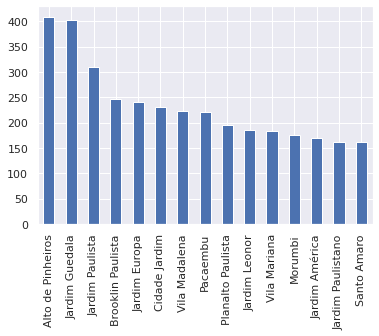

In [101]:
dados['Bairro'].value_counts().head(15).plot.bar()

### Conclusões

Pelos gráficos de barras, acima, vê-se que há uma relação entre a quantidade de ruas em um bairro e a quantidade de ruas sem nome no mesmo bairro. Isso parece fazer sentido, visto que quanto mais ruas há em um bairro, mais fácil ter algum dado perdido, ou que falta, nesse caso o nome da rua.

Contudo, essa relação não é diretamente procional, visto que não segue a mesma ordem que os dados originais, em quantidade de ruas, comparanando com o número de ruas sem nome.

## Trantando a coluna *Valor*

In [102]:
dados_valores = dados["Valor"].str.split(expand = True)

In [103]:
dados_valores[0].unique()

array(['R$'], dtype=object)

In [104]:
len(dados_valores[1].unique()), dados_valores[1].unique()

(1038, array(['7.000.000', '3.700.000', '380.000', ..., '553.000', '951.000',
        '2.200'], dtype=object))

In [105]:
dados_valores[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [106]:
dados[['Moeda', 'Preco', 'Modalidade']] = dados_valores
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Preco,Modalidade
9616,NaN,Vila Bancária Munhoz,São Paulo,185,3,3,5,R$ 710.000,R$,710.000,None
231,NaN,Jardim Franca,São Paulo,381,4,4,6,R$ 1.250.000,R$,1.250.000,None
4777,Rua Ribeiro Lisboa,Fazenda Morumbi,São Paulo,404,3,4,6,R$ 3.800.000,R$,3.800.000,None
8755,Travessa José Sancho,Santa Teresinha,São Paulo,356,4,5,5,R$ 1.700.000,R$,1.700.000,None
2110,NaN,Granja Julieta,São Paulo,550,4,6,6,R$ 4.950.000,R$,4.950.000,None
1052,"Rua Breves, 602",Chácara Monte Alegre,São Paulo,319,4,4,4,R$ 2.100.000,R$,2.100.000,None
9627,NaN,Vila Campo Grande,São Paulo,130,3,1,2,R$ 470.000,R$,470.000,None
7509,Rua Armando Brussolo,Vila Romana,São Paulo,254,3,3,2,R$ 1.900.000,R$,1.900.000,None
8154,Rua Guararema,Bosque da Saúde,São Paulo,300,3,2,3,R$ 900.000,R$,900.000,None
1086,NaN,Jardim Guedala,São Paulo,528,4,5,7,R$ 3.900.000,R$,3.900.000,None


In [107]:
dados_vendas = dados[dados["Modalidade"].isnull()]
dados_vendas.Modalidade.unique()

array([None], dtype=object)

In [108]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rua         6107 non-null   object
 1   Bairro      9146 non-null   object
 2   Cidade      9156 non-null   object
 3   Metragem    9156 non-null   int64 
 4   Quartos     9156 non-null   int64 
 5   Banheiros   9156 non-null   int64 
 6   Vagas       9156 non-null   int64 
 7   Valor       9156 non-null   object
 8   Moeda       9156 non-null   object
 9   Preco       9156 non-null   object
 10  Modalidade  0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


In [109]:
dados_vendas["Preco_em_M"] = dados_vendas["Preco"].str.replace(".", "").astype(float) / 1000000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


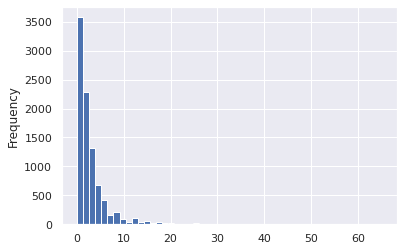

In [110]:
dados_vendas["Preco_em_M"].plot.hist(bins=50)

In [111]:
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Preco_em_M
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3.05
std,7856.42,1.05,1.97,2.60,3.94
min,10.00,1.00,1.00,1.00,0.01
25%,168.00,3.00,2.00,2.00,0.89
50%,276.00,3.00,4.00,4.00,1.80
75%,450.00,4.00,5.00,5.00,3.50
max,750000.00,16.00,40.00,50.00,65.00


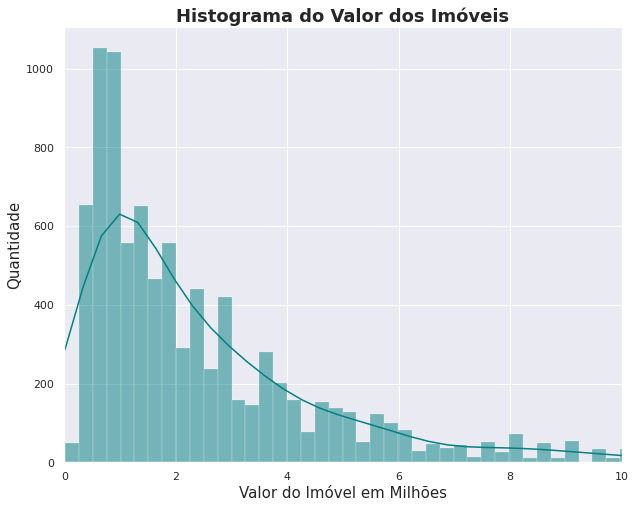

In [166]:
sns.set()
plt.figure(figsize=(10, 8))
ax = sns.histplot(data=dados_vendas, x='Preco_em_M', kde=True, color='teal', palette="light:m_r")
ax.set_title('Histograma do Valor dos Imóveis', weight='bold', size=18)
ax.set_xlim(-0.01, 10)
ax.set_xlabel("Valor do Imóvel em Milhões", size=15)
ax.set_ylabel("Quantidade", size=15)
plt.show()

#### Adição da coluna *Preço/m²* para entender melhor a base

In [116]:
dados_vendas["Preco/m²"] = dados_vendas["Preco_em_M"] * 1000000 / dados_vendas["Metragem"]
dados_vendas.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Preco,Modalidade,Preco_em_M,Preco/m²
4111,Rua General Sena Vasconcelos,Jardim Guedala,São Paulo,325,3,6,3,R$ 3.000.000,R$,3.000.000,None,3.00,9230.77
2375,Rua Morishigue Akagui,Vila Progredior,São Paulo,700,4,8,5,R$ 7.800.000,R$,7.800.000,None,7.80,11142.86
6668,NaN,Morumbi,São Paulo,685,4,6,4,R$ 4.400.000,R$,4.400.000,None,4.40,6423.36
9580,Rua Turquia,Jardim Europa,São Paulo,765,3,1,5,R$ 13.900.000,R$,13.900.000,None,13.90,18169.93
4972,Rua Januário Miraglia,Vila Nova Conceição,São Paulo,240,1,3,3,R$ 6.000.000,R$,6.000.000,None,6.00,25000.00
3155,Rua Madalena de Morais,Jardim Leonor,São Paulo,800,5,8,6,R$ 8.000.000,R$,8.000.000,None,8.00,10000.00
9963,NaN,Jardim Petrópolis,São Paulo,423,5,7,6,R$ 2.800.000,R$,2.800.000,None,2.80,6619.39
1817,Rua Francisco Dias Velho,Vila Cordeiro,São Paulo,200,1,2,2,R$ 1.600.000,R$,1.600.000,None,1.60,8000.00
6140,NaN,Indianópolis,São Paulo,220,3,1,3,R$ 1.680.000,R$,1.680.000,None,1.68,7636.36
8422,NaN,Vila São Paulo,São Paulo,195,3,1,2,R$ 1.400.000,R$,1.400.000,None,1.40,7179.49


In [153]:
m2_por_bairro = dados_vendas.groupby(by='Bairro')["Preco/m²"].mean().sort_values(ascending=False)

[]

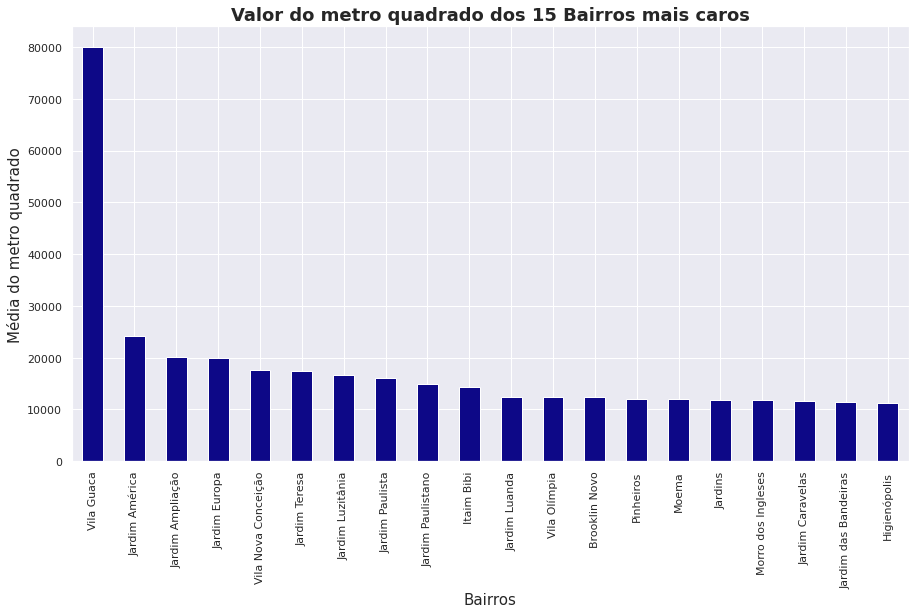

In [174]:
sns.set()
plt.figure(figsize=(15, 8))
m2_por_bairro.head(20).plot(kind='bar', colormap='plasma')
plt.title('Valor do metro quadrado dos 15 Bairros mais caros', weight='bold', size=18)
plt.ylabel("Média do metro quadrado", size=15)
plt.xlabel("Bairros", size=15)
plt.get_cmap('magma')
plt.plot()

### Conclusões

O primeiro colocado é bem superior ao demais, o que indica que há alguns problemas na base. Isso é justificado porque não é esperado uma diferença tão discrepante entre os preços do primeiro para o segundo mais caro. Além disso, como não houve muitos tratamentos dos dados é de se esperar que eles ainda estejam com algumas incoerências.